# Print probabilities from results

In [1]:
import math
import random
import numpy as np
from numpy import pi
import itertools
import matplotlib.pyplot as plt
import pickle

# Expected results
## What the theoric results from the paper are?
The following functions allow to prepare a matrix in the same shape the arrays simulated to compare against later.

In [2]:
def get_combinations_two_etas_without_repeats(input_list_lambda):
    """ from a given list of attenuations (lambdas) create a 
        list of all combinatorial pairs of possible lambdas
        without repeats (order does not matter).
        For us it is the same testing first lambda 0.1 and second lambda 0.2 
        than first lambda 0.2 and second lambda 0.1
    """
    list_lambda = input_list_lambda
     # when there is only one element, we add the same element
    if len(list_lambda) == 1:
        list_lambda.append(list_lambda[0])
    # get combinations of two lambdas without repeats
    return list(itertools.combinations(list_lambda, 2))

Here a result is computed to be operated in the same way that info from simulations.

In [3]:
# create the channels to be used
# from 0 to pi/2 in steps of 0.1, and adding the 1 as the last value
etas = np.append(np.arange(0, pi/2, pi/2/20), pi/2)

two_pair_etas = get_combinations_two_etas_without_repeats(etas)
probabilities = []
configurations = []
best_algorithm = ['THEORY']

#program_start_time = time.time()
print("Starting the execution")

for eta_pair in two_pair_etas:
    GLOBAL_LAMBDA1=eta_pair[0]
    GLOBAL_LAMBDA0=eta_pair[1]
    Gamma = np.cos(GLOBAL_LAMBDA1) + np.cos(GLOBAL_LAMBDA0)
    if Gamma < 1/np.sqrt(2):
        best_probability = 1/2 + 1/4*(np.cos(GLOBAL_LAMBDA1) - np.cos(GLOBAL_LAMBDA0))/np.sqrt(1-Gamma*Gamma)
        best_configuration = np.sqrt(1/(2 - 2 * Gamma * Gamma))
    else:
        best_probability = 1/2 * (np.sin(GLOBAL_LAMBDA0)*np.sin(GLOBAL_LAMBDA0) + np.cos(GLOBAL_LAMBDA1)*np.cos(GLOBAL_LAMBDA1))
        best_configuration = 1
    probabilities.append(best_probability)
    configurations.append(best_configuration)
    best_algorithm.append('THEORY')

print(f'Total pair of etas calculated: {len(two_pair_etas)}')

theoric_result1 = {
    "eta_pairs": two_pair_etas,
    "best_algorithm": best_algorithm,
    "probabilities": probabilities,
    "configurations": configurations
}

Starting the execution
Total pair of etas calculated: 210


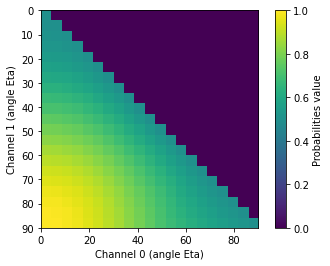

In [5]:
X3 = []
for eta_pair in theoric_result1['eta_pairs']:
    X3.append((eta_pair[1]))
    X3.append((eta_pair[0]))
X3 = sorted(list(dict.fromkeys(X3)))
lenx3 = len(X3)
probs3 = np.zeros((lenx3,lenx3))
values3 = list(theoric_result1.values())
for ind_prob in range(len(values3[2])):
    ind_0 = X3.index(theoric_result1['eta_pairs'][ind_prob][0])
    ind_1 = X3.index(theoric_result1['eta_pairs'][ind_prob][1])
    probs3[ind_1, ind_0]= values3[2][ind_prob]
for i in range(len(X3)):
    probs3[i, i]= 0.5   


fig = plt.figure('Probabilities from simulation')
ax1 = fig.add_subplot(111)
im = ax1.imshow(probs3, cmap='viridis', extent =(0, 90, 90, 0))
cb = plt.colorbar(im, label = 'Probabilities value')
ax1.set_xlabel('Channel 0 (angle Eta)')
ax1.set_ylabel('Channel 1 (angle Eta)')

plt.show()

In [6]:
# create the channels to be used
# from 0 to pi/2 in steps of 0.1, and adding the 1 as the last value
etas = np.append(np.arange(0, pi/2, pi/2/20), pi/2)
two_pair_etas = get_combinations_two_etas_without_repeats(etas)
    
probabilities = []
configurations = []
improvements = []
best_algorithm = ['THEORY']

#program_start_time = time.time()
print("Starting the execution")

for eta_pair in two_pair_etas:
    GLOBAL_LAMBDA0=eta_pair[1]
    GLOBAL_LAMBDA1=eta_pair[0]
    Gamma = np.cos(GLOBAL_LAMBDA1) + np.cos(GLOBAL_LAMBDA0)
    Y_= (Gamma-1)/(Gamma-2)
    if Y_ > 0:
        best_probability = 1/4*(np.cos(GLOBAL_LAMBDA1) - np.cos(GLOBAL_LAMBDA0))*((1 - Y_)*Gamma + np.sqrt((1 - Y_)*(4*Y_ + (1 - Y_)*Gamma*Gamma)))+1/2
        improvement = 1/4*(np.cos(GLOBAL_LAMBDA1) - np.cos(GLOBAL_LAMBDA0))*((1 - Y_)*Gamma + np.sqrt((1 - Y_)*(4*Y_ + (1 - Y_)*Gamma*Gamma))) - 1/2*Gamma*(np.cos(GLOBAL_LAMBDA1) - np.cos(GLOBAL_LAMBDA0))
    else:
        best_probability = 1/2*Gamma*(np.cos(GLOBAL_LAMBDA1) - np.cos(GLOBAL_LAMBDA0))+1/2
        improvement = 0
    best_configuration = max(0, Y_)
    probabilities.append(best_probability)
    configurations.append(best_configuration)
    improvements.append(improvement)
    best_algorithm.append('THEORY')

print(f'Total pair of etas calculated: {len(two_pair_etas)}')

theoric_result2 = {
    "eta_pairs": two_pair_etas,
    "best_algorithm": best_algorithm,
    "probabilities": probabilities,
    "configurations": configurations,
    "improvements": improvements
}

Starting the execution
Total pair of etas calculated: 210


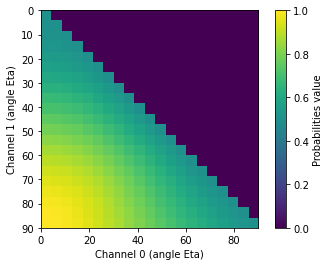

In [8]:
X3 = []
for eta_pair in theoric_result2['eta_pairs']:
    X3.append((eta_pair[1]))
    X3.append((eta_pair[0]))
X3 = sorted(list(dict.fromkeys(X3)))
lenx3 = len(X3)
probs4 = np.zeros((lenx3,lenx3))
values3 = list(theoric_result2.values())
for ind_prob in range(len(values3[2])):
    ind_0 = X3.index(theoric_result2['eta_pairs'][ind_prob][0])
    ind_1 = X3.index(theoric_result2['eta_pairs'][ind_prob][1])
    probs4[ind_1, ind_0]= values3[2][ind_prob]
for i in range(len(X3)):
    probs4[i, i]= 0.5   


fig = plt.figure('Probabilities from simulation')
ax1 = fig.add_subplot(111)
im = ax1.imshow(probs4, cmap='viridis', extent =(0, 90, 90, 0))
cb = plt.colorbar(im, label = 'Probabilities value')
ax1.set_xlabel('Channel 0 (angle Eta)')
ax1.set_ylabel('Channel 1 (angle Eta)')

plt.show()

# Compare probabilities 

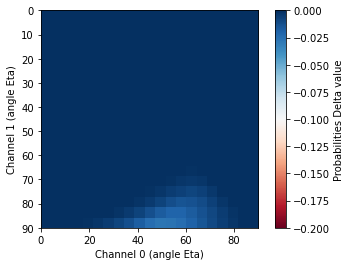

In [9]:
Delta_prob1= probs3 - probs4

fig = plt.figure('Difference in Probabilities (simulation vs. theory')
ax1 = fig.add_subplot(111)
im = ax1.imshow(Delta_prob1, cmap='RdBu', extent =(0, 90, 90, 0), vmin=-0.2, vmax=0)
cb = plt.colorbar(im, label = 'Probabilities Delta value')
ax1.set_xlabel('Channel 0 (angle Eta)')
ax1.set_ylabel('Channel 1 (angle Eta)')

plt.show()


 ## Simulation 1 vs theory in percentage

In [6]:
Total_col, Total_row = Delta_prob1.shape
col=Total_col
Delta_Pc_prob1= np.zeros((Total_col,Total_row))
while col > 0:
    row = Total_row
    while row > 0:
        if probs3[row-1, col-1] == 0:
            if Delta_prob1[row-1, col-1] == 0:
                Delta_Pc_prob1[row-1, col-1]= 0
            else:
                Delta_Pc_prob1[row-1, col-1]= 10000
        else:
            Delta_Pc_prob1[row-1, col-1] = 100*Delta_prob1[row-1, col-1]/probs3[row-1, col-1]
        row = row - 1
    col = col - 1

fig = plt.figure('Deviation in % from theoric probability (simulation vs. theory')
ax1 = fig.add_subplot(111)
im = ax1.imshow(Delta_Pc_prob1, cmap='RdBu', extent =(0, 90, 90, 0), vmin=-40, vmax=0)
cb = plt.colorbar(im, label = 'Probabilities Delta (%)')
ax1.set_xlabel('Channel 0 (angle Eta)')
ax1.set_ylabel('Channel 1 (angle Eta)')

plt.show()

NameError: name 'Delta_prob1' is not defined